<h2>Import Library</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split
from imblearn.under_sampling import RandomUnderSampler

<h2>Mount Drive</h2>

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Load train</h2>

In [3]:
TRAIN_PATH = '/content/drive/MyDrive/deteksi-gambar/data/training'

In [4]:
for class_name in ['organic', 'inorganic']:
    class_path = os.path.join(TRAIN_PATH, class_name)
    filenames = os.listdir(class_path)[:10]
    print(f"Class: {class_name}, Filenames: {filenames}")

Class: organic, Filenames: ['O_9135.jpg', 'O_9116.jpg', 'O_9123.jpg', 'O_9129.jpg', 'O_9127.jpg', 'O_9142.jpg', 'O_9147.jpg', 'O_9128.jpg', 'O_9151.jpg', 'O_9113.jpg']
Class: inorganic, Filenames: ['R_910.jpg', 'R_9131.jpg', 'R_9121.jpg', 'R_9115.jpg', 'R_912.jpg', 'R_909.jpg', 'R_9122.jpg', 'R_9099.jpg', 'R_9114.jpg', 'R_9139.jpg']


<h2>Model CNN</h2>

In [5]:
def get_model(IMG_SIZE):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  model.summary()

<h2>Training</h2>

In [6]:
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 100
N_SPLIT = 5
N_REPEAT = 5

In [7]:
acc_per_fold = []
loss_per_fold = []

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 155s 9s/step - loss: 0.6934 - accuracy: 0.6105 - val_loss: 0.6654 - val_accuracy: 0.6250
Epoch 2/100
17/17 [==============================] - 17s 986ms/step - loss: 0.5621 - accuracy: 0.7243 - val_loss: 0.3485 - val_accuracy: 0.9219
Epoch 3/100
17/17 [==============================] - 17s 998ms/step - loss: 0.4959 - accuracy: 0.7537 - val_loss: 0.3384 - val_accuracy: 0.8750
Epoch 4/100
17/17 [==============================] - 17s 1s/step - loss: 0.4659 - accuracy: 0.7978 - val_loss: 0.1616 - val_accuracy: 0.9219
Epoch 5/100
17/17 [==============================] - 17s 1s/step - loss: 0.4959 - accuracy: 0.7923 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 6/100
17/17 [==============================] - 18s 1s/step - loss: 0.4481 - accuracy: 0.8051 - val_loss: 0.2088 - val_accuracy: 0.9141
Epoch 7/100
17/17 [==============================] - 17s 981ms

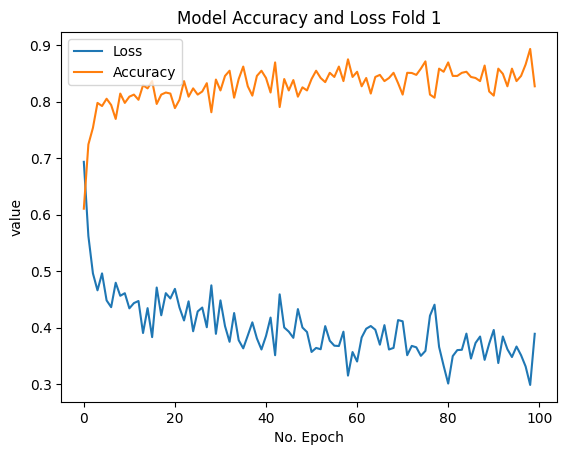

141/141 [==============================] - 39s 277ms/step


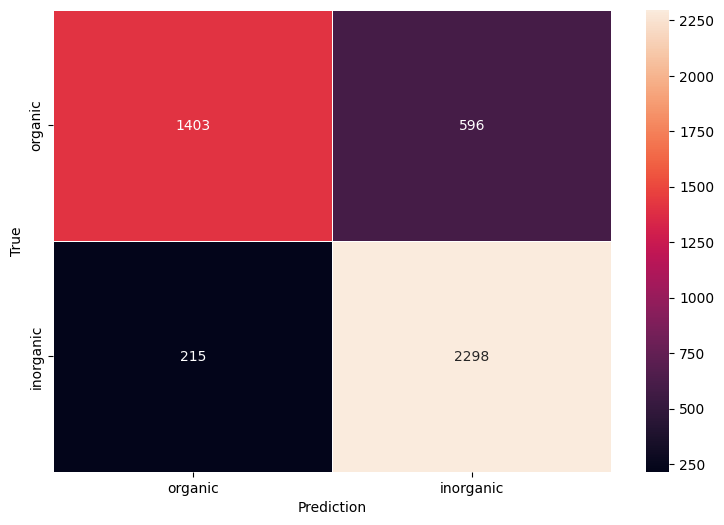

Score for fold 1: loss of 0.40174245834350586; accuracy of 82.02570676803589%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 27s 1s/step - loss: 0.6388 - accuracy: 0.6342 - val_loss: 0.6343 - val_accuracy: 0.6484
Epoch 2/100
17/17 [==============================] - 17s 989ms/step - loss: 0.5126 - accuracy: 0.7702 - val_loss: 0.7666 - val_accuracy: 0.6406
Epoch 3/100
17/17 [==============================] - 18s 997ms/step - loss: 0.4729 - accuracy: 0.7904 - val_loss: 0.6292 - val_accuracy: 0.6719
Epoch 4/100
17/17 [==============================] - 16s 942ms/step - loss: 0.4551 - accuracy: 0.7960 - val_loss: 0.3127 - val_accuracy: 0.8984
Epoch 5/100
17/17 [==============================] - 17s 976ms/step - loss: 0.4419 - accuracy: 0.8107 - val_loss: 0.1633 - val_accuracy: 0.9297
Epoch 6/100
17/17 [==============================] - 16s 935ms/step - loss: 0.4857 - accuracy: 0.7757 - val_loss: 0.4266

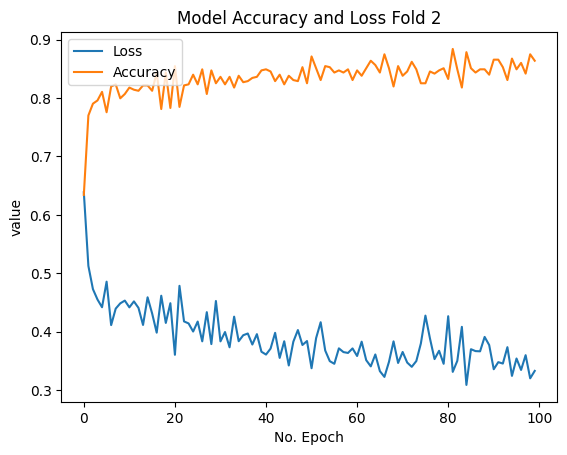

141/141 [==============================] - 33s 234ms/step


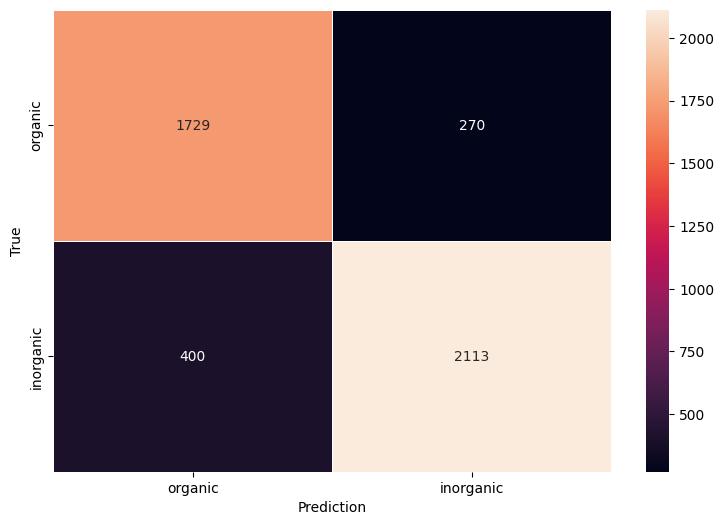

Score for fold 2: loss of 0.3620572090148926; accuracy of 85.15070676803589%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 24s 1s/step - loss: 0.6087 - accuracy: 0.6783 - val_loss: 0.4030 - val_accuracy: 0.8984
Epoch 2/100
17/17 [==============================] - 17s 954ms/step - loss: 0.5142 - accuracy: 0.7702 - val_loss: 0.1922 - val_accuracy: 0.9219
Epoch 3/100
17/17 [==============================] - 16s 940ms/step - loss: 0.4889 - accuracy: 0.7923 - val_loss: 0.2842 - val_accuracy: 0.9062
Epoch 4/100
17/17 [==============================] - 16s 929ms/step - loss: 0.4631 - accuracy: 0.8051 - val_loss: 0.3753 - val_accuracy: 0.8281
Epoch 5/100
17/17 [==============================] - 16s 933ms/step - loss: 0.4984 - accuracy: 0.7831 - val_loss: 0.2865 - val_accuracy: 0.9062
Epoch 6/100
17/17 [==============================] - 15s 894ms/step - loss: 0.4759 - accuracy: 0.8120 - val_loss: 0.4896 

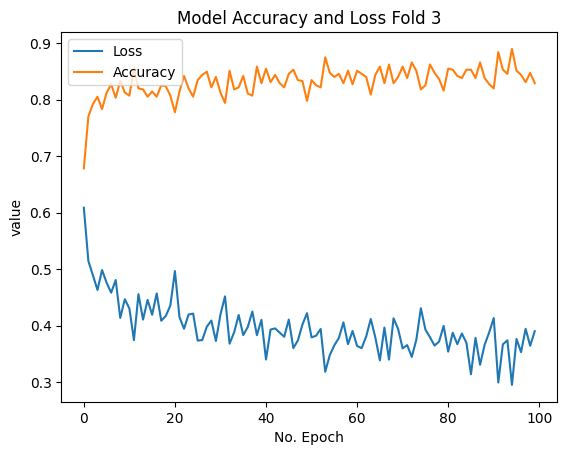

141/141 [==============================] - 33s 234ms/step


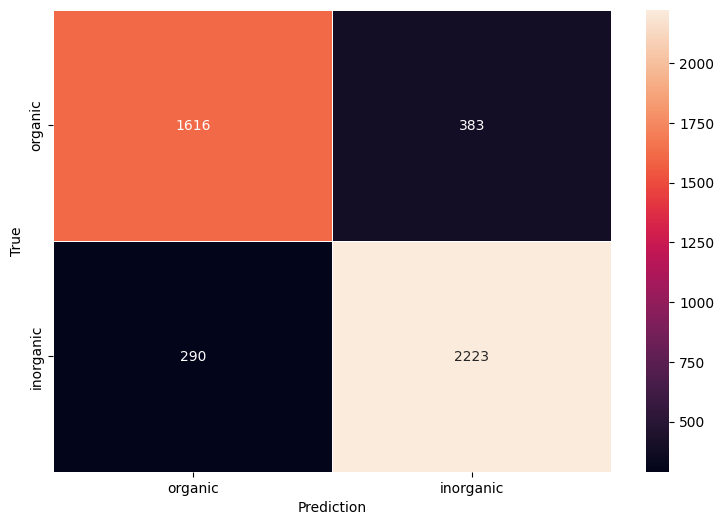

Score for fold 3: loss of 0.34636130928993225; accuracy of 85.08421778678894%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 29s 2s/step - loss: 0.6694 - accuracy: 0.6048 - val_loss: 0.5912 - val_accuracy: 0.7344
Epoch 2/100
17/17 [==============================] - 18s 1s/step - loss: 0.5361 - accuracy: 0.7592 - val_loss: 0.4163 - val_accuracy: 0.9062
Epoch 3/100
17/17 [==============================] - 15s 902ms/step - loss: 0.4623 - accuracy: 0.7849 - val_loss: 0.5964 - val_accuracy: 0.7344
Epoch 4/100
17/17 [==============================] - 15s 904ms/step - loss: 0.4557 - accuracy: 0.8088 - val_loss: 0.5152 - val_accuracy: 0.7266
Epoch 5/100
17/17 [==============================] - 15s 905ms/step - loss: 0.4973 - accuracy: 0.7831 - val_loss: 0.4449 - val_accuracy: 0.7734
Epoch 6/100
17/17 [==============================] - 16s 915ms/step - loss: 0.4825 - accuracy: 0.7978 - val_loss: 0.2449 - 

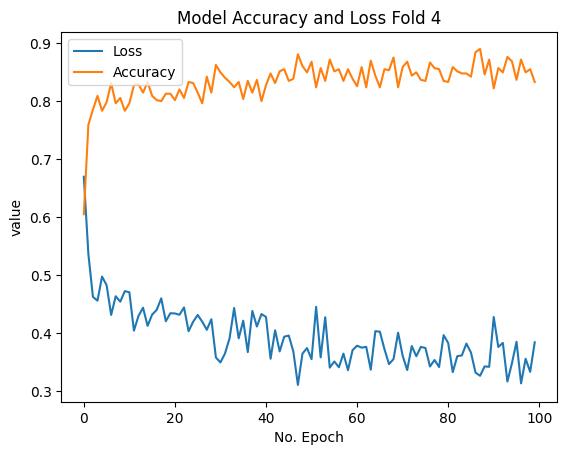

141/141 [==============================] - 36s 256ms/step


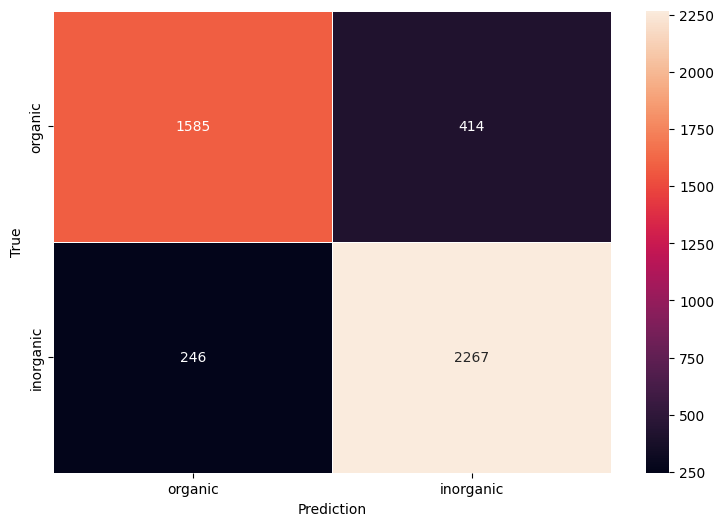

Score for fold 4: loss of 0.34243467450141907; accuracy of 85.3723406791687%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 22s 1s/step - loss: 0.6384 - accuracy: 0.6140 - val_loss: 0.5466 - val_accuracy: 0.7891
Epoch 2/100
17/17 [==============================] - 15s 908ms/step - loss: 0.4532 - accuracy: 0.8180 - val_loss: 0.3628 - val_accuracy: 0.8672
Epoch 3/100
17/17 [==============================] - 16s 923ms/step - loss: 0.4625 - accuracy: 0.7831 - val_loss: 0.2046 - val_accuracy: 0.9219
Epoch 4/100
17/17 [==============================] - 16s 913ms/step - loss: 0.4197 - accuracy: 0.8162 - val_loss: 0.3496 - val_accuracy: 0.8438
Epoch 5/100
17/17 [==============================] - 16s 916ms/step - loss: 0.4419 - accuracy: 0.8327 - val_loss: 0.3396 - val_accuracy: 0.8516
Epoch 6/100
17/17 [==============================] - 16s 929ms/step - loss: 0.4293 - accuracy: 0.8217 - val_loss: 0.5067 

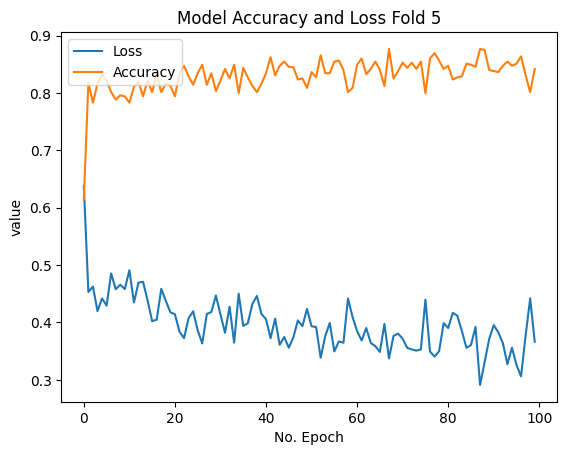

141/141 [==============================] - 36s 252ms/step


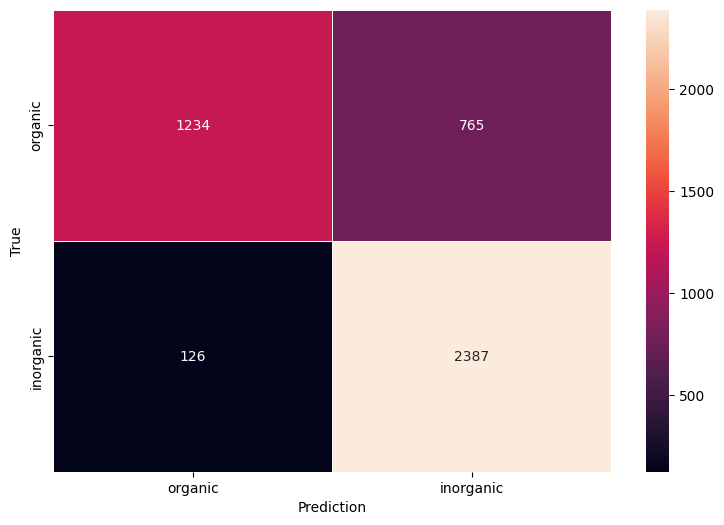

Score for fold 5: loss of 0.4155662953853607; accuracy of 80.2526593208313%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 27s 1s/step - loss: 0.7088 - accuracy: 0.5092 - val_loss: 0.6160 - val_accuracy: 0.9531
Epoch 2/100
17/17 [==============================] - 16s 913ms/step - loss: 0.5566 - accuracy: 0.7316 - val_loss: 0.7674 - val_accuracy: 0.6875
Epoch 3/100
17/17 [==============================] - 15s 885ms/step - loss: 0.5502 - accuracy: 0.7713 - val_loss: 0.3866 - val_accuracy: 0.9062
Epoch 4/100
17/17 [==============================] - 16s 923ms/step - loss: 0.5031 - accuracy: 0.7739 - val_loss: 0.4429 - val_accuracy: 0.7891
Epoch 5/100
17/17 [==============================] - 16s 944ms/step - loss: 0.4617 - accuracy: 0.7960 - val_loss: 0.2742 - val_accuracy: 0.8984
Epoch 6/100
17/17 [==============================] - 16s 911ms/step - loss: 0.4497 - accuracy: 0.7978 - val_loss: 0.2732 -

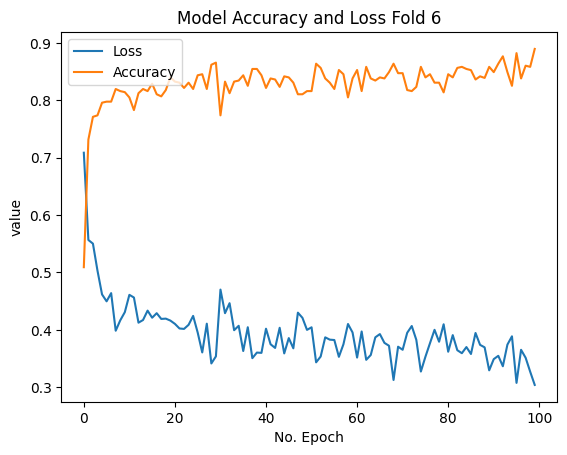

141/141 [==============================] - 37s 262ms/step


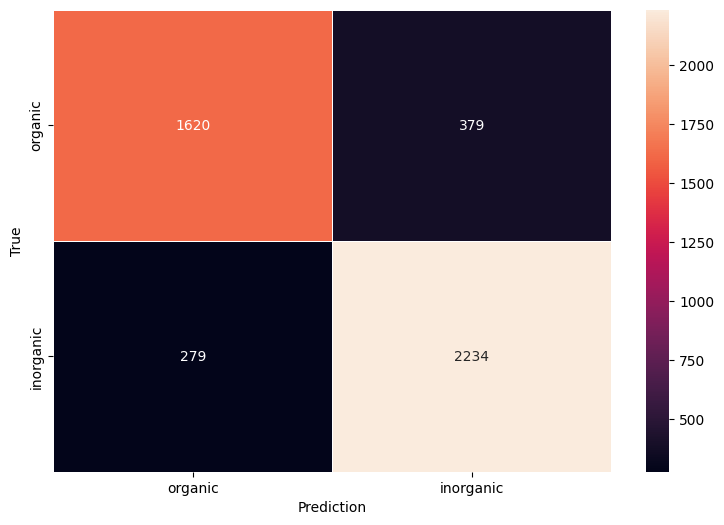

Score for fold 6: loss of 0.34991368651390076; accuracy of 85.41666865348816%
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Epoch 1/100
17/17 [==============================] - 24s 1s/step - loss: 0.6071 - accuracy: 0.7188 - val_loss: 0.5370 - val_accuracy: 0.8359
Epoch 2/100
17/17 [==============================] - 15s 870ms/step - loss: 0.4717 - accuracy: 0.7996 - val_loss: 0.4352 - val_accuracy: 0.8438
Epoch 3/100
17/17 [==============================] - 15s 905ms/step - loss: 0.4192 - accuracy: 0.8272 - val_loss: 0.1941 - val_accuracy: 0.9375
Epoch 4/100
17/17 [==============================] - 15s 897ms/step - loss: 0.4155 - accuracy: 0.8217 - val_loss: 0.3564 - val_accuracy: 0.8359
Epoch 5/100
17/17 [==============================] - 15s 907ms/step - loss: 0.4334 - accuracy: 0.8217 - val_loss: 0.1222 - val_accuracy: 0.9375
Epoch 6/100
17/17 [==============================] - 15s 881ms/step - loss: 0.4553 - accuracy: 0.8088 - val_loss: 0.3209

UnknownError: ignored

In [8]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

datagen_validation = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

kfold = RepeatedKFold(n_splits=N_SPLIT, n_repeats=N_REPEAT, random_state=42)
j = 0

organic_files = os.listdir(os.path.join(TRAIN_PATH, 'organic'))
inorganic_files = os.listdir(os.path.join(TRAIN_PATH, 'inorganic'))

num_samples_per_class = min(len(organic_files), len(inorganic_files))

np.random.shuffle(organic_files)
np.random.shuffle(inorganic_files)

organic_files = organic_files[:num_samples_per_class]
inorganic_files = inorganic_files[:num_samples_per_class]

all_files = organic_files + inorganic_files
all_labels = ['organic'] * len(organic_files) + ['inorganic'] * len(inorganic_files)

for train_idx, valid_idx in kfold.split(all_files, all_labels):
    j += 1

    x_train_filenames = np.array(all_files)[train_idx]
    y_train_labels = np.array(all_labels)[train_idx]
    x_valid_filenames = np.array(all_files)[valid_idx]
    y_valid_labels = np.array(all_labels)[valid_idx]

    training_set = datagen_train.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    validation_set = datagen_validation.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        subset='validation'
    )

    model = get_model(IMG_SIZE)

    history = model.fit(
        training_set,
        validation_data=validation_set,
        epochs=EPOCHS,
        steps_per_epoch=len(training_set) // BATCH_SIZE,
        validation_steps=len(validation_set) // BATCH_SIZE,
        verbose = 1
    )

    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title(f'Model Accuracy and Loss Fold {j}')
    plt.ylabel('value')
    plt.xlabel('No. Epoch')
    plt.legend(loc="upper left")
    plt.show()

    scores = model.evaluate(validation_set, verbose=0)

    pred = model.predict(validation_set)
    y_pred = np.argmax(pred, axis=1)

    cf_matrix = confusion_matrix(validation_set.classes, y_pred)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(cf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.xlabel('Prediction')
    plt.ylabel('True')
    ax.xaxis.set_ticklabels(['organic', 'inorganic'])
    ax.yaxis.set_ticklabels(['organic', 'inorganic'])
    plt.show()

    model.save(f'/content/drive/MyDrive/deteksi-gambar/model/model{j}.h5')
    print(f'Score for fold {j}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])


In [9]:
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - loss: {loss_per_fold[1]} - accuracy: {acc_per_fold[i]}%')
print('Average scores for all fold')
print(f'> Accuracy total: {np.mean(acc_per_fold)}')
print(f'> Loss Total: {np.mean(loss_per_fold)}')

Score per fold
> Fold 1 - loss: 0.3620572090148926 - accuracy: 82.02570676803589%
> Fold 2 - loss: 0.3620572090148926 - accuracy: 85.15070676803589%
> Fold 3 - loss: 0.3620572090148926 - accuracy: 85.08421778678894%
> Fold 4 - loss: 0.3620572090148926 - accuracy: 85.3723406791687%
> Fold 5 - loss: 0.3620572090148926 - accuracy: 80.2526593208313%
> Fold 6 - loss: 0.3620572090148926 - accuracy: 85.41666865348816%
Average scores for all fold
> Accuracy total: 83.88371666272481
> Loss Total: 0.3696792721748352


<function matplotlib.pyplot.show(close=None, block=None)>

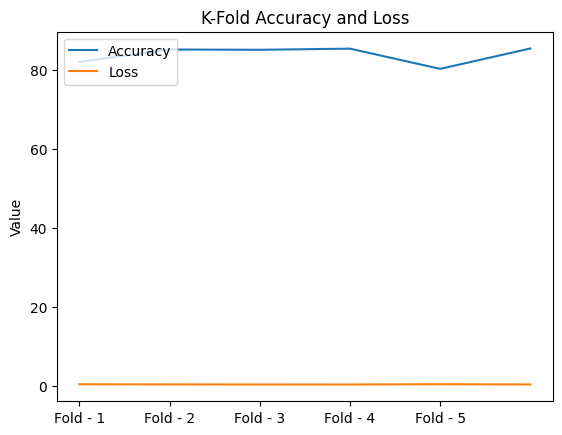

In [10]:
plt.plot(acc_per_fold, label='Accuracy')
plt.plot(loss_per_fold, label='Loss')
plt.title('K-Fold Accuracy and Loss')
plt.ylabel('Value')
x = ["Fold - 1", "Fold - 2", "Fold - 3", "Fold - 4", "Fold - 5"]

default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.legend(loc="upper left")
plt.style.use('ggplot')
plt.show